# "WeRateDogs" Twitter Data Wrangling Report
This document communicate analysis findings from "WeRateDogs" Twitter Archive and Image Prediction datasets which have cleaned previously.<br/>
Data: 1971 observations (15 Nov 2015 - 1 Aug 2017)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df_tweet_clean = pd.read_csv('../data/weratedogs_twitter/twitter_archive_master.csv')
df_img_clean = pd.read_csv('../data/weratedogs_twitter/image_prediction_master.csv')

## How about favorite and retweet distributions?

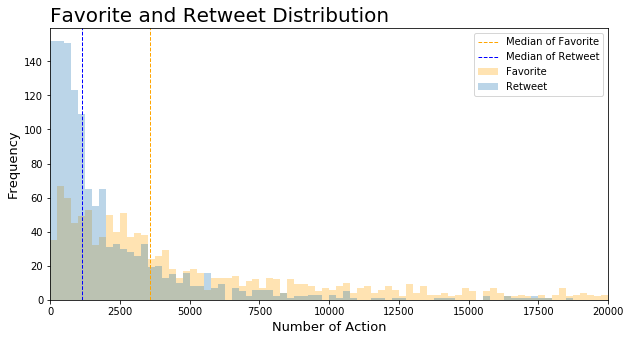

In [4]:
# Visualize favorite num and retweet num distribution
# Bin size 
bin_edges = np.arange(0, 120500, 250)

plt.figure(figsize=(10,5));
plt.hist(df_tweet_clean['favorite_num'], bins=bin_edges, alpha=0.3, color='orange', label='Favorite');
plt.hist(df_tweet_clean['retweet_num'], bins=bin_edges, alpha=0.3, label='Retweet');

plt.axvline(df_tweet_clean['favorite_num'].median(), color='orange', linestyle='dashed', linewidth=1, label='Median of Favorite')
plt.axvline(df_tweet_clean['retweet_num'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median of Retweet')

# Set x-axis limit
plt.xlim(0,20000)

# Add legend
plt.legend(loc=1, ncol=1);

# Add titles
plt.title("Favorite and Retweet Distribution", loc='left', fontsize=20, fontweight=0, color='black');
plt.xlabel("Number of Action", fontsize=13);
plt.ylabel("Frequency", fontsize=13);

<div style='color:blue'>Insight: Most of original tweets in WeRateDogs where in our observation have 1146 retweets and have been favorited by 3562 twitter accounts.</div>

## Which twitter properties have correlation?

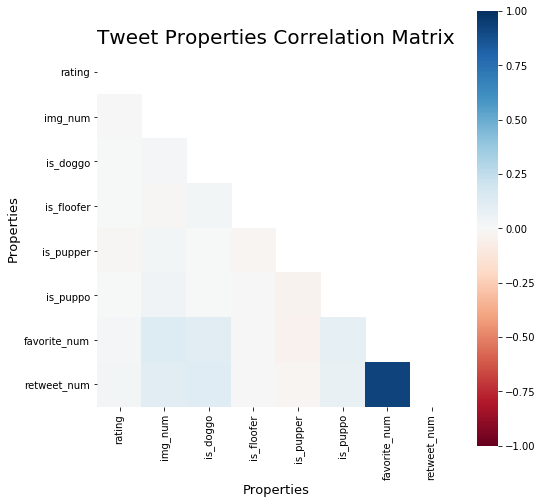

In [4]:
corrs = (df_tweet_clean.iloc[:,1:]).corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8));
sns.heatmap(corrs, cmap='RdBu', mask=mask, square=True, vmin=-1, vmax=1);

# Add titles
plt.title("Tweet Properties Correlation Matrix", loc='left', fontsize=20, fontweight=0, color='black');
plt.xlabel("Properties", fontsize=13);
plt.ylabel("Properties", fontsize=13);

<div style='color:blue'>Insight: Num of favorite and num of retweet have moderate positive corelation.</div>

## What is the most popular dog names?

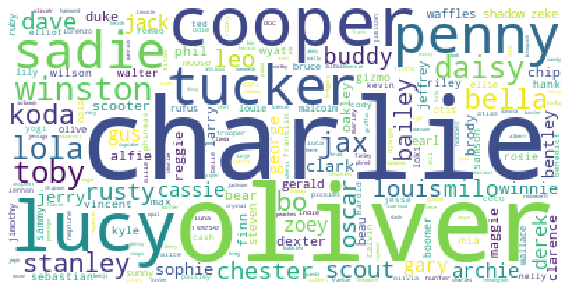

In [5]:
# Join name string
word_string = " ".join(df_tweet_clean[df_tweet_clean['name'].isna()==False].name.str.lower())
word_cloud = WordCloud(background_color='white', max_words=300).generate(word_string)

# Create word claud chart
plt.figure(figsize=(10,10))
plt.clf()
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

<div style='color:blue'>Insight: Charlie, Oliver, and Chooper are the most popular dog names that we get from 1971 observations from "WeRateDogs" Twitter Archive Dataset.</div>

## How many observations which their top 3 prediction results said that is not a dog(s)?

In [6]:
df_img_not_dog = df_img_clean.query('prediction_is_dog==False')
df_img_not_dog_agg = df_img_not_dog.groupby(['tweet_id'], as_index=False)[['prediction_is_dog']].count()

df_img_not_dog_agg[df_img_not_dog_agg['prediction_is_dog']==3].shape[0]

305

<div style='color:blue'>Insight: Based on top 3 prediction results of each tweet that we get from Image Prediction Dataset, there are 305 of 1971 tweets that are predicted not attach picture of dog(s).</div>